In [ ]:
!pip install kagglehub



In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("subhajournal/phishingemails")

print("Path to dataset files:", path)

100%|██████████| 18.0M/18.0M [00:00<00:00, 88.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/subhajournal/phishingemails/versions/1


In [3]:
import os

# List the files in the downloaded dataset directory
dataset_path = '/root/.cache/kagglehub/datasets/subhajournal/phishingemails/versions/1'
os.listdir(dataset_path)


['Phishing_Email.csv']

In [4]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv(os.path.join(dataset_path, "Phishing_Email.csv"))  # Adjust filename as necessary

print(df.head())


   Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  


In [5]:

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB
None


In [6]:

df = df.drop(columns=["Unnamed: 0"])

print(df.isnull().sum())

df = df.dropna(subset=["Email Text"])

print(df.info())


Email Text    16
Email Type     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 18634 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  18634 non-null  object
 1   Email Type  18634 non-null  object
dtypes: object(2)
memory usage: 436.7+ KB
None


In [7]:
import re

# Function to clean the email text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply the cleaning function to the Email Text column
df['Email Text'] = df['Email Text'].apply(clean_text)

# Display the cleaned text
print(df['Email Text'].head())


0    re      disc  uniformitarianism  re    sex  la...
1    the other side of  galicismos   galicismo  is ...
2    re  equistar deal tickets are you still availa...
3    \nhello i am your hot lil horny toy\n    i am ...
4    software at incredibly low prices    lower   d...
Name: Email Text, dtype: object


In [8]:
from sklearn.model_selection import train_test_split

# Features and labels
X = df['Email Text']
y = df['Email Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 14907
Testing set size: 3727


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Evaluate the model
accuracy = model.score(X_test_vec, y_test)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9584115910920311


In [10]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test_vec)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


Confusion Matrix:
[[1402  116]
 [  39 2170]]
Classification Report:
                precision    recall  f1-score   support

Phishing Email       0.97      0.92      0.95      1518
    Safe Email       0.95      0.98      0.97      2209

      accuracy                           0.96      3727
     macro avg       0.96      0.95      0.96      3727
  weighted avg       0.96      0.96      0.96      3727



Accuracy: 0.9584
Precision: 0.9729
Recall: 0.9236
F1 Score: 0.9476

Classification Report:
                precision    recall  f1-score   support

Phishing Email       0.97      0.92      0.95      1518
    Safe Email       0.95      0.98      0.97      2209

      accuracy                           0.96      3727
     macro avg       0.96      0.95      0.96      3727
  weighted avg       0.96      0.96      0.96      3727



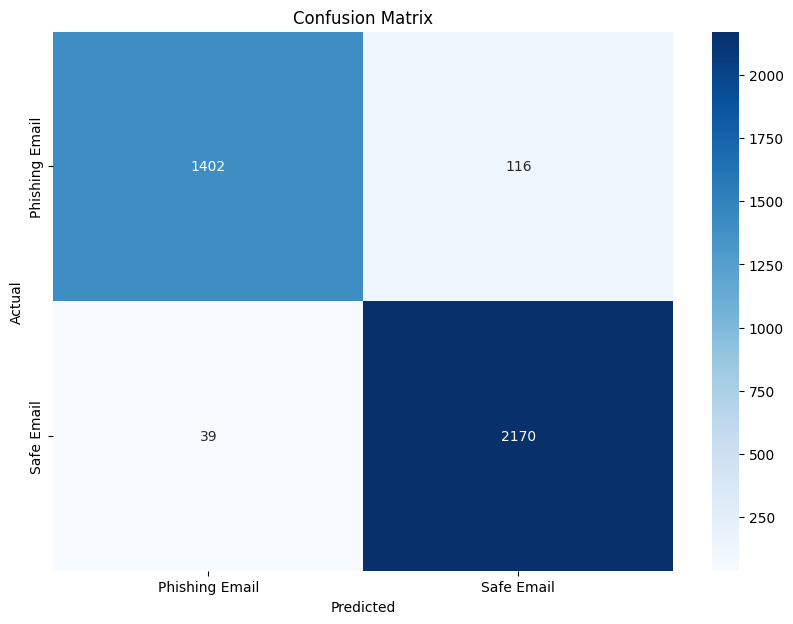

In [11]:
import kagglehub
import pandas as pd
import numpy as np
import re
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 7: Evaluate the Model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, pos_label='Phishing Email')
recall = recall_score(y_test, y_pred, pos_label='Phishing Email')
f1 = f1_score(y_test, y_pred, pos_label='Phishing Email')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Phishing Email', 'Safe Email']))

# Step 8: Visualize the Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Phishing Email', 'Safe Email'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Phishing Email', 'Safe Email'], yticklabels=['Phishing Email', 'Safe Email'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [12]:
# Save the trained model and vectorizer
joblib.dump(model, 'email_classifier_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.


In [13]:
import joblib
import re


model = joblib.load('email_classifier_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Function to clean the email text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text


def classify_email(email_text):

    email_text_cleaned = clean_text(email_text)
    email_vectorized = vectorizer.transform([email_text_cleaned])

    # Predict
    prediction = model.predict(email_vectorized)
    return prediction[0]

# Get user input for email content
user_input_email = input("Please enter the email content you want to classify:\n")
prediction = classify_email(user_input_email)

# Display the classification result
print(f"The email is classified as: {prediction}")



Please enter the email content you want to classify:
Bacheelor, MasteerMBA, and Doctoraate diplomas available in the field of your choice that's right, you can even become a Doctor and receive all the benefits that comes with it!  Our Diplomas/Certificates are recognised in most countries  No required examination, tests, classes, books, or interviews.  ** No one is turned down ** Confidentiality assured  CALL US 24 HOURS A DAY, 7 DAYS A WEEK  For US: 1-781-634-7970 Outside US: +1-781-634-7970  "Just leave your NAME & PHONE NO. (with CountryCode)" in the voicemail  our staff will get back to you in next few days  \
The email is classified as: Phishing Email


In [14]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/13

In [15]:
import gradio as gr
import pandas as pd
import numpy as np
import re
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load the trained model and vectorizer
model = joblib.load('email_classifier_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Function to classify the email
def classify_email(email_text):
    email_text_cleaned = clean_text(email_text)
    email_vectorized = vectorizer.transform([email_text_cleaned])
    prediction = model.predict(email_vectorized)
    return prediction[0]


iface = gr.Interface(
    fn=classify_email,
    inputs=gr.Textbox(lines=5, placeholder="Enter the email content here..."),
    outputs=gr.Text(),
    title="Email Phishing Classifier",
    description="Enter the content of an email to check if it's phishing or safe.",
    flagging_mode='never'
)

# Launch the Gradio app
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3326f7c3611e2afffb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
